In [15]:
%matplotlib inline
from qanta.guesser.wikipedia import *
from functional import seq
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
wiki = WikiNetworkGuesser()

In [5]:
db = QuestionDatabase(QB_QUESTION_DB)

Since deep learning does well for questions with many examples, lets only consider questions that have one training example. These would be the most difficult to get correct using traditional learning methods and multi class classification

In [6]:
qs = db.questions_with_pages()
qs = seq(qs.values()).filter(lambda x: len(x) == 1).flatten().list()

In [7]:
for i, q in enumerate(qs[0:100]):
    print('Starting iteration {}'.format(i))
    words = wiki.tokenize(q.flatten_text())
    sub_graph, seed_vertexes = wiki.build_subgraph(words)
    wiki.node2vec_input(q.page.lower().replace(' ', '_'), sub_graph, 'output/wiki_network')

Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
No wiki entry for: battle_of_panipat_(1761)
Starting iteration 5
Starting iteration 6
No wiki entry for: 18_(number)
Starting iteration 7
No wiki entry for: united_states_presidential_election,_1824
Starting iteration 8
No wiki entry for: 1830s
Starting iteration 9
No wiki entry for: emancipation_reform_of_1861
Starting iteration 10
Starting iteration 11
No wiki entry for: 1929
Starting iteration 12
No wiki entry for: 1968_democratic_national_convention
Starting iteration 13
No wiki entry for: 1993_world_trade_center_bombing
Starting iteration 14
No wiki entry for: james_scott,_1st_duke_of_monmouth
Starting iteration 15
Starting iteration 16
No wiki entry for: 25_(number)
Starting iteration 17
Starting iteration 18
No wiki entry for: 32_(number)
Starting iteration 19
No wiki entry for: 360_(number)
Starting iteration 20
No wiki entry for: 4_months,_3_weeks_and_2_days
Starting iterat

From here I want to find out how many of these 100 sampled questions can be answered. Since each subgraph takes the seed vertexes, walks out one, then takes the largest connected component its possible the answer does not exist. The node file has a label 1 on vertexes that correspond to the answer and 0 otherwise so we can use this. It would also be nice to have an idea of the network size

In [9]:
!ls output/wiki_network

132073_edges.txt  391088_meta.txt   65962_edges.txt   784810_meta.txt
132073_meta.txt   43994_edges.txt   65962_meta.txt    83713_edges.txt
145161_edges.txt  43994_meta.txt    66212_edges.txt   83713_meta.txt
145161_meta.txt   441922_edges.txt  66212_meta.txt    850650_edges.txt
146942_edges.txt  441922_meta.txt   675413_edges.txt  850650_meta.txt
146942_meta.txt   443213_edges.txt  675413_meta.txt   851804_edges.txt
157002_edges.txt  443213_meta.txt   689748_edges.txt  851804_meta.txt
157002_meta.txt   458026_edges.txt  689748_meta.txt   858949_edges.txt
162551_edges.txt  458026_meta.txt   699743_edges.txt  858949_meta.txt
162551_meta.txt   465148_edges.txt  699743_meta.txt   878407_edges.txt
162564_edges.txt  465148_meta.txt   699776_edges.txt  878407_meta.txt
162564_meta.txt   466690_edges.txt  699776_meta.txt   886428_edges.txt
181364_edges.txt  466690_meta.txt   703031_edges.txt  886428_meta.txt
181364_meta.txt   4956_edges.txt    703031_meta.txt   896789_edges.txt
242259_edges.tx

In [10]:
!head output/wiki_network/385457_meta.txt

0 4521985 seltjarnarnes
0 3276803 maulvi_bazar_district
0 2359300 immenstaad
0 1835013 free_content
0 2359302 immenstadt
0 4063240 private_secretary_to_the_sovereign
0 4915209 taray_district
0 2359306 immenstedt
0 841047 byczyna
0 3276812 maulvibazar_sadar_upazila


In [21]:
n_total = 0
n_possible = 0
network_sizes = []
possible_networks = []
for file_name in glob.glob('output/wiki_network/*_meta.txt'):
    with open(file_name) as f:
        size = 0
        for line in f:
            if line.startswith('1'):
                n_possible +=1
                possible_networks.append(file_name)
            size += 1
        
        network_sizes.append(size)
        n_total += 1
network_sizes = np.array(network_sizes)

Total: 69
Possible: 40
Fraction: 0.5797101449275363
Network Size Stats
Mean: 33204.4782609
Median: 27974.0
Std: 21275.56321


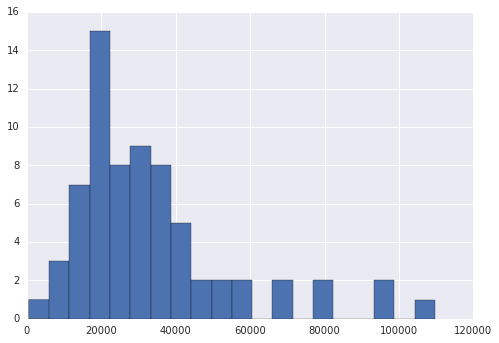

In [20]:
print('Total:', n_total)
print('Possible:', n_possible)
print('Fraction:', n_possible / n_total)
print('Network Size Stats')
print('Mean:', np.mean(network_sizes))
print('Median:', np.median(network_sizes))
print('Std:', np.std(network_sizes))

histogram = plt.hist(network_sizes, bins=20)

This is good news that about 60% of questions have networks where there are answers. Lets now use node2vec to featurize the networks that do have the answer

In [24]:
possible_networks

['output/wiki_network/773152_meta.txt',
 'output/wiki_network/251692_meta.txt',
 'output/wiki_network/162564_meta.txt',
 'output/wiki_network/466690_meta.txt',
 'output/wiki_network/36696_meta.txt',
 'output/wiki_network/986280_meta.txt',
 'output/wiki_network/898353_meta.txt',
 'output/wiki_network/965106_meta.txt',
 'output/wiki_network/762453_meta.txt',
 'output/wiki_network/776690_meta.txt',
 'output/wiki_network/465148_meta.txt',
 'output/wiki_network/589798_meta.txt',
 'output/wiki_network/157002_meta.txt',
 'output/wiki_network/740345_meta.txt',
 'output/wiki_network/878407_meta.txt',
 'output/wiki_network/316300_meta.txt',
 'output/wiki_network/75469_meta.txt',
 'output/wiki_network/635743_meta.txt',
 'output/wiki_network/959923_meta.txt',
 'output/wiki_network/752453_meta.txt',
 'output/wiki_network/363863_meta.txt',
 'output/wiki_network/541100_meta.txt',
 'output/wiki_network/95854_meta.txt',
 'output/wiki_network/242259_meta.txt',
 'output/wiki_network/766084_meta.txt',
 'o